# Let's Cluster some Credit Cards!
In this notebook we will try to cluster some credit cards. We will go through preprocessing, choose a model and train it on our data, and then evaluate our outcomes.

The dataset you will use is `Credit Card Dataset.csv`

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, AgglomerativeClustering

# EDA
Explore the Dataset Perform initial exploration of your dataset. Understand the features and the distribution of data.

In [72]:
# Load the dataset
df = pd.read_csv("Credit Card Dataset.csv")

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [73]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [74]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [75]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


# Preprocessing
1. Remove the outliers
2. Impute missing data
3. Scale the data
4. Reduce dimentions using PCA

In [76]:
# Handling missing data
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.drop(['CUST_ID', 'BALANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'TENURE'], axis=1, inplace=True)

In [77]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_clean

df_clean = remove_outliers_iqr(df)
print(f"Shape before removing outliers: {df.shape}")
print(f"Shape after removing outliers: {df_clean.shape}")

Shape before removing outliers: (8636, 14)
Shape after removing outliers: (4487, 14)


In [78]:
# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

#### Dimention Reduction using PCA
K-means, DBSCAN and agglomerative clustering, all use the Euclidean distance, which starts to lose its meaning when the number of dimensions starts increasing. so, before using these methods, we have to reduce the number of dimensions. We are going to use PCA, which is by far the most popular dimensionality reduction algorithm.

Please set the parameter `n_components` equals to 0.9, which means that the PCA will automatically produce enough PCs that will preserve 90% of variance in the dataset.

In [79]:
# PCA for dimensionality reduction
pca = PCA(n_components=0.9)  # Preserve 90% variance
df_pca = pca.fit_transform(df_scaled)
print(f"Number of components after PCA: {df_pca.shape[1]}")

Number of components after PCA: 7


# Train the Model
Now that we have done the preprocessing step, we can perform K-means clustering on the data.

* Find the `n_clusters` parameter using the elbow method.
* Train the model.

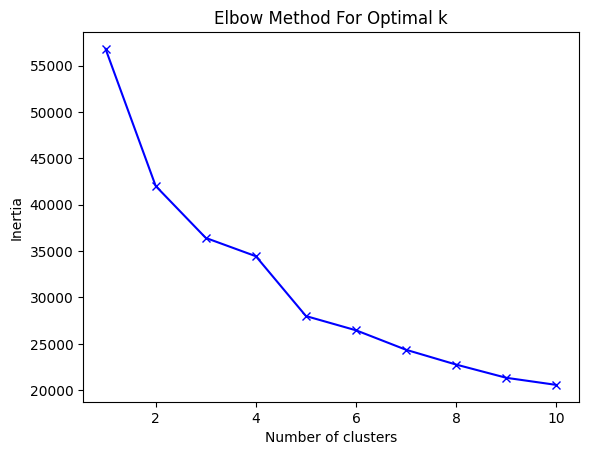

In [80]:
# Elbow method to find optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [81]:
# Train the K-means model
optimal_k = 4  # Based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_pca)

# Predict clusters
clusters = kmeans.predict(df_pca)

# Add cluster information to the original dataset
df_clean['Cluster'] = clusters

<ipython-input-81-16d5e146b2f1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = clusters


# Evaluate the Model

In [82]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_pca)
    score = silhouette_score(df_pca, clusters)
    print(f'Silhouette Score for {k} clusters: {score}')

Silhouette Score for 2 clusters: 0.27709616910091067
Silhouette Score for 3 clusters: 0.2049650962228985
Silhouette Score for 4 clusters: 0.21028851239456922
Silhouette Score for 5 clusters: 0.21393466232484967
Silhouette Score for 6 clusters: 0.19482919345193003
Silhouette Score for 7 clusters: 0.20454152928449543
Silhouette Score for 8 clusters: 0.22765580688711823
Silhouette Score for 9 clusters: 0.22151677729185065


# Plot the data points with their predicted cluster center

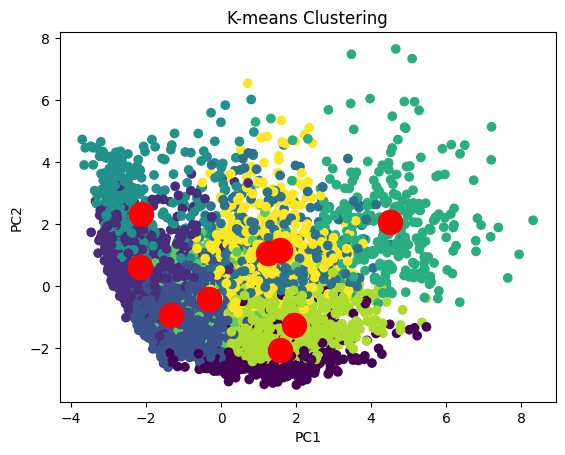

In [83]:
# Plot the clustered data
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [84]:
from sklearn.cluster import DBSCAN

for eps in [0.3, 0.5, 0.7]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_clusters = dbscan.fit_predict(df_pca)
    score = silhouette_score(df_pca, dbscan_clusters)
    print(f'DBSCAN Silhouette Score (eps={eps}): {score}')

DBSCAN Silhouette Score (eps=0.3): -0.402805307283662
DBSCAN Silhouette Score (eps=0.5): -0.43996914929951436
DBSCAN Silhouette Score (eps=0.7): -0.3488830817698332


In [85]:
from sklearn.cluster import AgglomerativeClustering

for linkage in ['ward', 'complete', 'average']:
    agg = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    agg_clusters = agg.fit_predict(df_pca)
    score = silhouette_score(df_pca, agg_clusters)
    print(f'Agglomerative Clustering Silhouette Score (linkage={linkage}): {score}')

Agglomerative Clustering Silhouette Score (linkage=ward): 0.2536405579811634
Agglomerative Clustering Silhouette Score (linkage=complete): 0.23330056224354306
Agglomerative Clustering Silhouette Score (linkage=average): 0.3389030362201649
